#**Création des données**


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Circle
from matplotlib.patches import FancyArrowPatch

In [ ]:
WISC = []
for i in range(1, 16):
    WISC.append('l{}'.format(i))

CUB = pd.Series([5, 4, 2, 5, 4, 2, 3, 1, 0, 2, 1, 4, 3, 1, 2],index=WISC)
PUZ = pd.Series([5, 3, 1, 3, 4, 0, 3, 2, 1, 0, 2, 2, 2, 0, 1],index=WISC)
CAL = pd.Series([4, 3, 2, 5, 3, 1, 4, 1, 0, 1, 1, 4, 3, 0, 1],index=WISC)
MEM = pd.Series([0, 2, 3, 3, 2, 3, 2, 4, 3, 3, 1, 2, 3, 3, 2],index=WISC)
COM = pd.Series([1, 2, 2, 4, 3, 1, 4, 3, 1, 1, 0, 1, 2, 2, 3],index=WISC)
VOC = pd.Series([1, 1, 2, 3, 2, 1, 4, 3, 0, 0, 1, 2, 3, 2, 2],index=WISC)
# Création du data frame
df = pd.DataFrame({
    'CUB': CUB,
    'PUZ': PUZ,
    'CAL': CAL,
    'MEM': MEM,
    'COM': COM,
    'VOC': VOC
})
df

,CUB,PUZ,CAL,MEM,COM,VOC
l1,5,5,4,0,1,1
l2,4,3,3,2,2,1
l3,2,1,2,3,2,2
l4,5,3,5,3,4,3
l5,4,4,3,2,3,2
l6,2,0,1,3,1,1
l7,3,3,4,2,4,4
l8,1,2,1,4,3,3
l9,0,1,0,3,1,0
l10,2,0,1,3,1,0


# **Normalisation des données**

In [ ]:
for colonne in df.columns:
    moyenne = df[colonne].mean()
    ecart_type = df[colonne].std(ddof=0)
    df[colonne] = df[colonne].apply(lambda x: round((x - moyenne) / ecart_type, 2))

print("Donnée centrée et normalisée :")
df

Donnée centrée et normalisée :


,CUB,PUZ,CAL,MEM,COM,VOC
l1,1.60,2.14,1.16,-2.52,-0.87,-0.72
l2,0.94,0.74,0.51,-0.42,0.00,-0.72
l3,-0.40,-0.65,-0.13,0.63,0.00,0.18
l4,1.60,0.74,1.80,0.63,1.73,1.08
l5,0.94,1.44,0.51,-0.42,0.87,0.18
l6,-0.40,-1.35,-0.77,0.63,-0.87,-0.72
l7,0.27,0.74,1.16,-0.42,1.73,1.99
l8,-1.07,0.05,-0.77,1.68,0.87,1.08
l9,-1.74,-0.65,-1.41,0.63,-0.87,-1.63
l10,-0.40,-1.35,-0.77,0.63,-0.87,-1.63


# **Matrice de Corrélation**



*   Plus la valeur est proche de -1 ou 1, plus la corrélation entre les deux variables est forte. Plus la valeur est proche de 0, plus la corrélation est faible.

*   A l'aide de la matrice de corrélation, on peut décider si on peut appliquer ACP ou Non.

*  Pour cela, il faut examiner la structure de corrélation entre les variables. Si les variables sont **fortement corrélées**, l’ACP peut être **utile** pour réduire la dimensionnalité.
*   En revanche, si les variables sont **faiblement corrélées**, l’ACP pourrait **ne pas apporter** beaucoup d’informations supplémentaires.








In [ ]:
R = (1/len(df)* df.T.dot(df)).round(2)
print('Matrice de corrélation:')
R


Matrice de corrélation:


,CUB,PUZ,CAL,MEM,COM,VOC
CUB,1.00,0.73,0.92,-0.45,0.31,0.27
PUZ,0.73,1.00,0.75,-0.62,0.28,0.29
CAL,0.92,0.75,1.00,-0.37,0.41,0.49
MEM,-0.45,-0.62,-0.37,1.00,0.30,0.20
COM,0.31,0.28,0.41,0.30,1.00,0.78
VOC,0.27,0.29,0.49,0.20,0.78,1.00


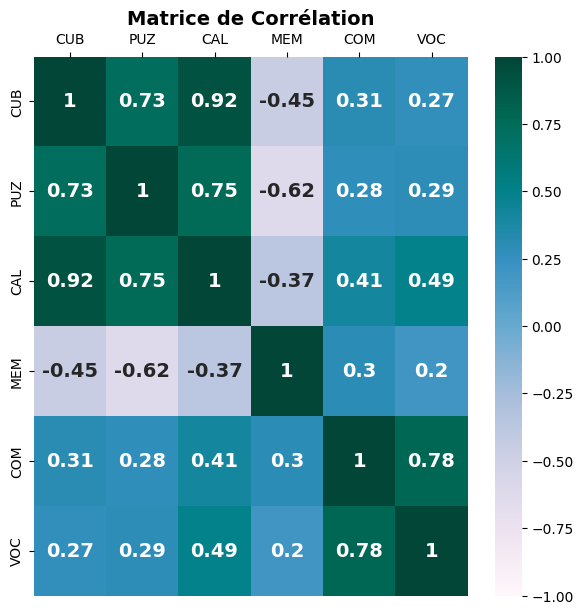

In [ ]:
plt.figure(figsize=(7,7))
annot_kws = {'fontsize': 14, 'fontweight': 'bold'}
ax = sns.heatmap(R, annot=True, vmin=-1, vmax=1, cmap='PuBuGn',annot_kws=annot_kws)
ax.set_title('Matrice de Corrélation',fontsize=14, fontweight='bold')
ax.xaxis.tick_top()
plt.show()

Vu que la matrice de corrélation est une matrice **carré et symétrique**, on peut **masquer** soit la **partie supérieure** ou **inférieure de la diagonale**.

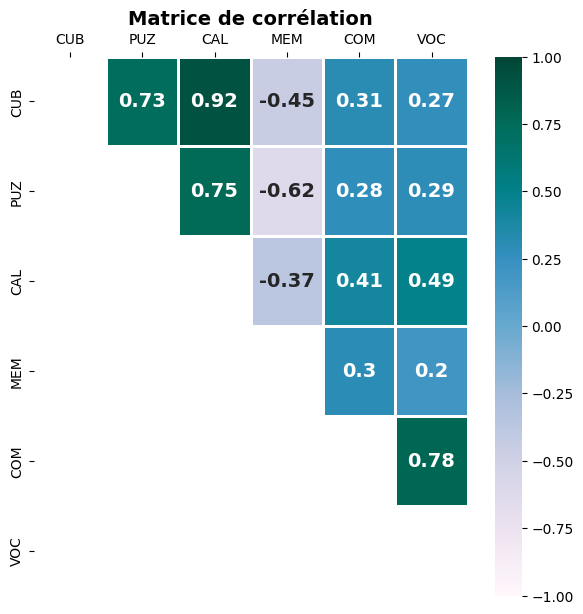

In [ ]:
#Matrice de corrélation en masquant la partie inférieure
plt.figure(figsize=(7,7))
annot_kws = {'fontsize': 14, 'fontweight': 'bold'}
mask = np.tril(np.ones((R.shape[0], R.shape[1]), dtype=bool))
ax=sns.heatmap(R, mask=mask,  cmap='PuBuGn',linewidths=2, annot=True,annot_kws=annot_kws,  vmin=-1, vmax=1)
ax.set_title('Matrice de corrélation', fontsize = 14, fontweight='bold')
ax.xaxis.tick_top()
plt.show()

# **Valeurs propres et Vecteurs Propres**


1.   valeurs_propres : Indique la quantité de variance expliquée par chaque composante principale.

2.   vecteurs_propres: Indique la direction des axes principaux dans l’espace des variables initiales.


In [ ]:

# Calcul des valeurs propres et des vecteurs propres
valeurs_propres, vecteurs_propres = np.linalg.eig(R)

# Tri des valeurs propres en ordre décroissant
indices_tri = valeurs_propres.argsort()[::-1]
valeurs_propres = np.round(valeurs_propres[indices_tri],2)
vecteurs_propres = np.round(vecteurs_propres[:, indices_tri],2)

# Affichage des valeurs propres
print("Valeurs propres:")
for i, valeur_propre in enumerate(valeurs_propres):
    print(f"λ{i+1} = {valeur_propre:}")
print()

# Affichage des vecteurs propres
print("Vecteurs propres:")
for i, vecteur_propre in enumerate(vecteurs_propres):
    print(f"v{i+1} = {vecteur_propre}")

Valeurs propres:
λ1 = 3.26
λ2 = 1.83
λ3 = 0.45
λ4 = 0.25
λ5 = 0.17
λ6 = 0.04

Vecteurs propres:
v1 = [-0.5  -0.15  0.54 -0.04 -0.25  0.61]
v2 = [-0.48 -0.21 -0.34 -0.42  0.65  0.1 ]
v3 = [-0.52 -0.03  0.37  0.3   0.1  -0.7 ]
v4 = [ 0.25  0.58  0.53 -0.16  0.53  0.08]
v5 = [-0.3   0.56 -0.16 -0.57 -0.46 -0.19]
v6 = [-0.32  0.53 -0.38  0.62  0.1   0.29]


# **Pourcentage D'inertie**

*   Le pourcentage d'inertie représente la quantité d'information recueillie par un axe principal.

*   Si une composante principale explique une grande quantité de variance, cela signifie qu'elle capture beaucoup d'informations utiles dans les données et peut donc être importante à inclure dans l'analyse.

*   Le pourcentage d'inertie est une mesure utile pour évaluer la qualité de l'ACP et **pour décider du nombre de composantes principales à conserver** pour la modélisation ou la visualisation des données.

In [ ]:
#Calcul du pourcentage inertie
pourcentages_inertie = np.round((valeurs_propres / np.sum(valeurs_propres)) * 100, 2)
# Calcul du pourcentage cumulé
pourcentage_cumule = np.cumsum(pourcentages_inertie)
#Valeur propres; %Inertie; % Cumulé
df_inertie= pd.DataFrame({'Valeurs propres': valeurs_propres,
                    '% Inertie': pourcentages_inertie,
                    '% Cumulé': pourcentage_cumule})
df_inertie

,Valeurs propres,% Inertie,% Cumulé
0,3.26,54.33,54.33
1,1.83,30.50,84.83
2,0.45,7.50,92.33
3,0.25,4.17,96.50
4,0.17,2.83,99.33
5,0.04,0.67,100.00


# **Histogramme des valeurs propres**

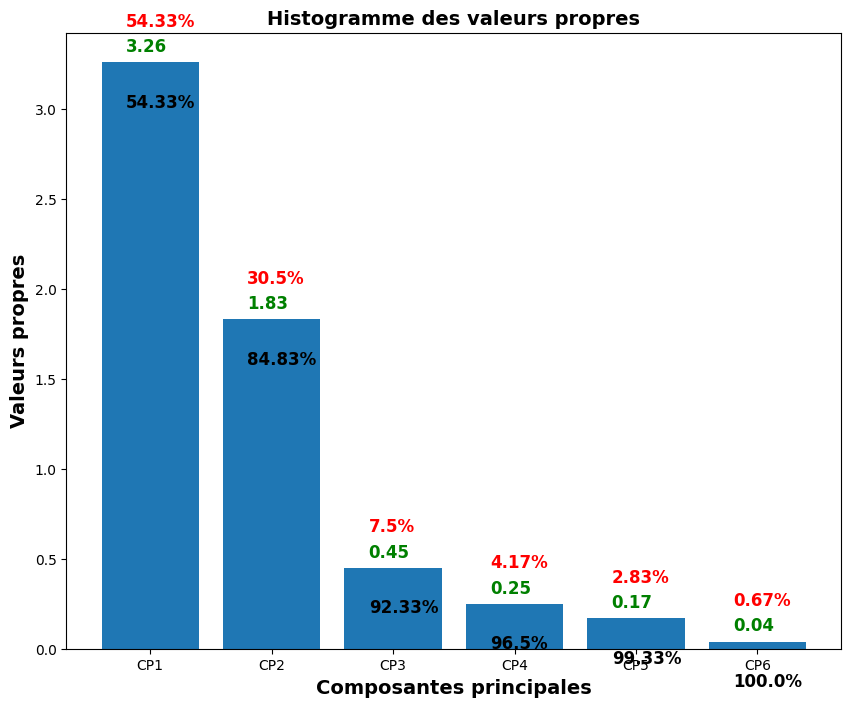

In [ ]:
# Création de la figure
plt.figure(figsize=(10, 8))
# Création de l'histogramme
plt.bar(range(len(valeurs_propres)), valeurs_propres)
plt.xticks(range(len(valeurs_propres)), ['CP1', 'CP2', 'CP3', 'CP4', 'CP5','CP6'])
plt.xlabel('Composantes principales',fontsize='14',fontweight='bold')
plt.ylabel('Valeurs propres',fontsize='14',fontweight='bold')
plt.title('Histogramme des valeurs propres',fontsize='14',fontweight='bold')

# Ajout des pourcentages d'inertie et cumulés

for i, v in enumerate(valeurs_propres):
    plt.text(i - 0.2, v + 0.06, str(round(v, 2)), color='green',fontsize='12',fontweight='bold')
    plt.text(i - 0.2, v + 0.2, str(round(pourcentages_inertie[i], 2)) + '%', color='red',fontsize='12',fontweight='bold')
    plt.text(i - 0.2, v - 0.25, str(round(pourcentage_cumule[i], 2)) + '%', color='black',fontsize='12',fontweight='bold')

# Affichage du graphique
plt.show()

# **Composante Principale**



*   En régle général, on utilise plusieurs critères pour déterminer le nombre optimal de composantes principales à conserver.
*   Les critères les plus couramment utilisés sont:

    *   **Le critère de Kaiser** (valeurs propres supérieures à 1):les CP dont la valeur propre est supérieure à 1 expliquent plus de variance que ne le ferait celle inférieure à 1. Ainsi, les CP dont la valeur propre est supérieure à 1 sont considérés comme **importantes** et doivent être conservés.

        *   Cependant, il est important de noter que ce critère n'est pas une règle absolue et doit être considéré en conjonction avec d'autres critères tels que % inertie et l'objectif de l'analyse. Il peut y avoir des cas où les CP dont la valeur propre est inférieure à 1 contiennent des informations importantes et doivent être conservés.
    *   **Le pourcentage de variance expliquée(%inertie)**: on conserve suffisamment de CP pour atteindre un certain seuil de %inertie, souvent fixé à 70%, 80% ou 90%.
        *   Plus le pourcentage d'inertie est élevé pour une composante principale donnée, plus cette composante principale est importante pour la description et la compréhension des données. Lorsque l'on utilise l'analyse en composantes principales, l'objectif est souvent de réduire la dimensionnalité des données en conservant la majeure partie de l'information contenue dans les données, et donc de conserver un maximum d'inertie.
    

In [ ]:
# Transformer l'ensemble de données original en un nouvel ensemble de données
vecteurs_propres[:, 1] = vecteurs_propres[:, 1] * -1
print(vecteurs_propres[:, 1])
scores = np.dot(df, vecteurs_propres)

print('\nvecteur propres:\n', vecteurs_propres)
print('\nDonnées:\n', df)
# Convertir en DataFrame
scores = pd.DataFrame(scores,columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']).round(2)

print('\nComposantes Principales:\n')
scores

[ 0.15  0.21  0.03 -0.58 -0.56 -0.53]

vecteur propres:
 [[-0.5   0.15  0.54 -0.04 -0.25  0.61]
 [-0.48  0.21 -0.34 -0.42  0.65  0.1 ]
 [-0.52  0.03  0.37  0.3   0.1  -0.7 ]
 [ 0.25 -0.58  0.53 -0.16  0.53  0.08]
 [-0.3  -0.56 -0.16 -0.57 -0.46 -0.19]
 [-0.32 -0.53 -0.38  0.62  0.1   0.29]]

Données:
       CUB   PUZ   CAL   MEM   COM   VOC
l1   1.60  2.14  1.16 -2.52 -0.87 -0.72
l2   0.94  0.74  0.51 -0.42  0.00 -0.72
l3  -0.40 -0.65 -0.13  0.63  0.00  0.18
l4   1.60  0.74  1.80  0.63  1.73  1.08
l5   0.94  1.44  0.51 -0.42  0.87  0.18
l6  -0.40 -1.35 -0.77  0.63 -0.87 -0.72
l7   0.27  0.74  1.16 -0.42  1.73  1.99
l8  -1.07  0.05 -0.77  1.68  0.87  1.08
l9  -1.74 -0.65 -1.41  0.63 -0.87 -1.63
l10 -0.40 -1.35 -0.77  0.63 -0.87 -1.63
l11 -1.07  0.05 -0.77 -1.47 -1.73 -0.72
l12  0.94  0.05  1.16 -0.42 -0.87  0.18
l13  0.27  0.05  0.51  0.63  0.00  1.08
l14 -1.07 -1.35 -1.41  0.63  0.00  0.18
l15 -0.40 -0.65 -0.77 -0.42  0.87  0.18

Composantes Principales:



,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.57,3.05,-0.36,-0.16,0.10,0.13
1,-0.96,0.94,0.50,-0.57,0.00,0.05
2,0.68,-0.66,0.22,0.26,0.02,-0.12
3,-2.80,-1.46,0.93,-0.25,-0.09,-0.18
4,-1.85,0.12,-0.22,-0.81,0.15,0.21
5,1.90,0.14,0.70,0.30,-0.19,0.17
6,-2.35,-1.55,-0.93,0.34,-0.29,-0.36
7,0.72,-2.21,-0.54,-0.30,0.82,0.17
8,2.86,0.55,-0.15,-0.70,0.44,-0.40
9,2.19,0.62,1.05,-0.26,-0.28,-0.10




*   Vecteurs Propres :



Les vecteurs propres représentent les directions des axes des composantes principales dans l'espace original des variables. Ils indiquent la contribution de chaque variable à chaque composante principale. Chaque vecteur propre est un vecteur de poids pour chaque variable.
*   Composantes Principales (Scores) :

Les composantes principales (scores) représentent les coordonnées de chaque individu dans l'espace des composantes principales. Chaque individu est projeté sur chaque composante principale, ce qui donne un score pour chaque composante principale. Ces scores indiquent la contribution de chaque individu à chaque composante principale.

In [ ]:

scores = pd.DataFrame(np.dot(df, np.column_stack((vecteurs_propres[:, 0], vecteurs_propres[:, 1] * -1))), columns=['PC1', 'PC2'])


scores = pd.DataFrame(np.dot(df, vecteurs_propres)[:, :2], columns=['PC1', 'PC2'])


print('\nComposantes Principales:\n')
scores


Composantes Principales:



,PC1,PC2
0,-2.5690,3.0546
1,-0.9650,0.9369
2,0.6795,-0.6612
3,-2.7983,-1.4572
4,-1.8500,0.1197
5,1.8973,0.1368
6,-2.3542,-1.5492
7,0.7248,-2.2071
8,2.8553,0.5459
9,2.1885,0.6191


# **Composantes principales, contributions et qualités de représentation des individus**


*   **Les scores** représentent la projection de chaque individu sur les axes factoriels définis par l'ACP.
    *   Les scores sont calculés en multipliant la matrice des données centrées par la matrice des vecteurs propres  associés aux valeurs propres choisis.
    *   Les scores sont souvent utilisés pour visualiser les données dans l'espace des composantes principales, pour identifier des groupes d'individus similaires.

*   **Les charges** représentent l'importance de chaque variable dans la formation de chaque composante principale.



*   Les charges permettent de comprendre les relations entre les variables et les composantes principales, tandis que les scores des individus permettent de comprendre les relations entre les individus et les composantes principales.


*   La **contribution** mesure l'importance de l'élément(individu ou variable) dans la formation de la composante principale, tandis que la **qualité** mesure la pertinence de l'élément (individu ou variable) par rapport à cette composante principale.

In [ ]:
# Calculer les contributions des individus
indiv_contributions = pd.DataFrame((scores**2 / np.sum(scores**2, axis=0)) * 100).round(2)

# Calculer la qualité des individus
indiv_qualite = pd.DataFrame((scores**2 / np.sum(scores**2, axis=1).values.reshape(-1,1))).round(2)


# Concaténer les scores ,les contributions et les qualités des individus dans un nouveau dataframe

contr_Qualite_indv = pd.concat([scores, indiv_contributions, indiv_qualite], axis=1)

contr_Qualite_indv.columns = ['PC1_score', 'PC2_score', 'PC1_contribution', 'PC2_contribution', 'Qualité_PC1', 'Qualité_PC2']


contr_Qualite_indv

,PC1_score,PC2_score,PC1_contribution,PC2_contribution,Qualité_PC1,Qualité_PC2
0,-2.5690,3.0546,13.41,33.91,0.41,0.59
1,-0.9650,0.9369,1.89,3.19,0.51,0.49
2,0.6795,-0.6612,0.94,1.59,0.51,0.49
3,-2.7983,-1.4572,15.91,7.72,0.79,0.21
4,-1.8500,0.1197,6.96,0.05,1.00,0.00
5,1.8973,0.1368,7.32,0.07,0.99,0.01
6,-2.3542,-1.5492,11.26,8.72,0.70,0.30
7,0.7248,-2.2071,1.07,17.70,0.10,0.90
8,2.8553,0.5459,16.57,1.08,0.96,0.04
9,2.1885,0.6191,9.73,1.39,0.93,0.07


# **Représentation des individus dans le premier plan factoriel**



*   Cette représentation graphique des individus dans le premier plan factoriel nous permet de visualiser la structure des données dans un espace de dimensions réduit.
*   Chaque point dans le nuage de points représente un individu dans l'échantillon. Les coordonnées de chaque point sont déterminées par les scores de l'individu sur PC1 et PC2. Les individus similaires dans leur structure et leurs caractéristiques auront tendance à être regroupés ensemble dans cet espace.



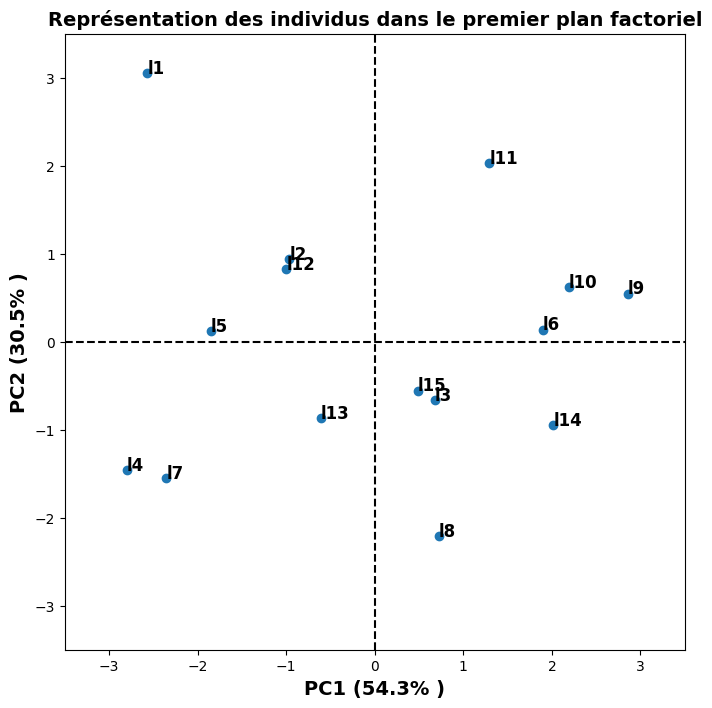

In [ ]:
plt.figure(figsize=(8, 8))
# créer un nuage de points des scores
plt.scatter(scores['PC1'], scores['PC2'])

# ajouter des étiquettes
for i, name in enumerate(df.index):
    plt.annotate(name, (scores.iloc[i, 0], scores.iloc[i, 1]),fontsize='12',fontweight='bold')

# ajouter des étiquettes et un titre d'axe
plt.xlabel('PC1 ({:.1f}% )'.format(pourcentages_inertie[0]),fontsize='14',fontweight='bold')
plt.ylabel('PC2 ({:.1f}% )'.format(pourcentages_inertie[1]),fontsize='14',fontweight='bold')
plt.title('Représentation des individus dans le premier plan factoriel',fontsize='14',fontweight='bold')


# ajouter une ligne à x=0 et y=0
plt.axvline(0, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')

# définir les limites de l'axe
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

plt.show()

# **Composantes principales, contributions et qualités de représentation des variables**

In [ ]:
# Sélection des deux premiers vecteurs propres et des deux premières valeurs propres
vecteur_propres = vecteurs_propres[:, :2]
valeur_propres = valeurs_propres[:2]
print(vecteur_propres)
print(valeur_propres)

# Calcul des charges

charges = np.round(vecteur_propres * np.sqrt(valeur_propres), 2)

contributions = np.round(charges ** 2 / np.sum(charges ** 2, axis=0), 2)
qualities = np.round(charges ** 2 / np.sum(charges ** 2, axis=1).reshape(-1, 1), 2)

contr_Qualite_var = pd.DataFrame({
    'Charges PC1': charges[:, 0],
    ' Charges PC2': charges[:, 1],
    'Contributions PC1': contributions[:, 0],
    'Contributions PC2': contributions[:, 1],
    'Qualités PC1': qualities[:, 0],
    'Qualités PC2': qualities[:, 1]
}, index=df.columns)

contr_Qualite_var

[[-0.5   0.15]
 [-0.48  0.21]
 [-0.52  0.03]
 [ 0.25 -0.58]
 [-0.3  -0.56]
 [-0.32 -0.53]]
[3.26 1.83]


,Charges PC1,Charges PC2,Contributions PC1,Contributions PC2,Qualités PC1,Qualités PC2
CUB,-0.90,0.20,0.25,0.02,0.95,0.05
PUZ,-0.87,0.28,0.23,0.04,0.91,0.09
CAL,-0.94,0.04,0.27,0.00,1.00,0.00
MEM,0.45,-0.78,0.06,0.33,0.25,0.75
COM,-0.54,-0.76,0.09,0.32,0.34,0.66
VOC,-0.58,-0.72,0.10,0.28,0.39,0.61


# **Cercle de Corrélation**

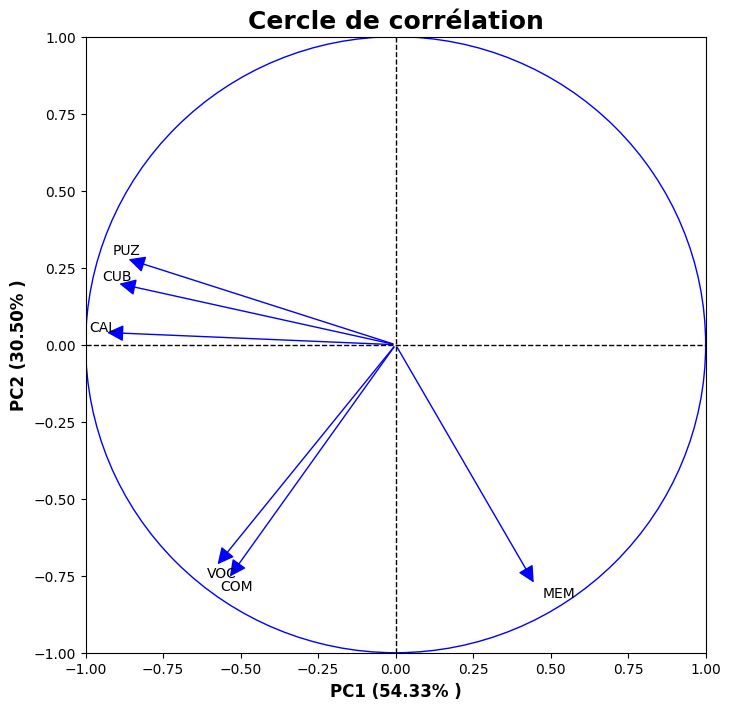

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(y=0, color='black', linestyle='--', linewidth=1.0)
ax.axvline(x=0, color='black', linestyle='--', linewidth=1.0)

ax.set_xlabel('PC1 ({:.2f}% )'.format(pourcentages_inertie[0]), fontsize=12,fontweight='bold')
ax.set_ylabel('PC2 ({:.2f}% )'.format(pourcentages_inertie[1]), fontsize=12,fontweight='bold')

for i, var in enumerate(df.columns):


    arrow = FancyArrowPatch((0, 0), (charges[i, 0], charges[i, 1]), arrowstyle='-|>',
                             mutation_scale=25, color='blue')
    ax.add_patch(arrow)
    ax.annotate(var, (charges[i, 0], charges[i, 1]), xytext=(charges[i, 0] * 1.05, charges[i, 1] * 1.05))
circle = Circle((0, 0), radius=1, edgecolor='blue', facecolor='none')
ax.add_artist(circle)

'''for i, var in enumerate(df_normée.columns):
    ax.annotate(var, (charges[i, 0], charges[i, 1]))'''

ax.set_title('Cercle de corrélation', fontsize=18, fontweight='bold')

plt.show()

# **A quoi correspond la somme des valeurs propres ?**

In [ ]:
inertie_totale = np.sum(valeurs_propres)
print("Inertie totale :", inertie_totale)

Inertie totale : 6.0


# **On choisit de n'étudier que les deux premières composantes principales.**

 Justifier ce choix en analysant le tableau des valeurs propres.



*   On analysant le tableau des valeurs propres, on va choisir de conserver seulement les composantes principales dont les valeurs propres sont supèrieures à 1(le critère de kaiser).


# **Quels sont les subtests les plus fortement corrélés entre eux ?**

In [ ]:
# Recherche des paires de subtests les plus fortement corrélées
max_correlation = R.where(np.triu(np.ones(R.shape), k=1) == 1)
most_correlated = max_correlation.abs().stack().nlargest(5)

# Affichage des paires de subtests les plus fortement corrélées
print("Les subtests les plus fortement corrélés entre eux :")
print(most_correlated)


Les subtests les plus fortement corrélés entre eux :
CUB  CAL    0.92
COM  VOC    0.78
PUZ  CAL    0.75
CUB  PUZ    0.73
PUZ  MEM    0.62
dtype: float64


# **La représentation graphique des variables montre qu'elles sont toutes très bien représentées dans le plan (CP1, CP2).**
Justifier cette affirmation.



*   Le cercle de corrélation représente les corrélations entre les variables et les composantes principales
*   Chaque variable est représentée comme un vecteur dans le cercle, dont la longueur représente la corrélation entre la variable et la composante principale correspondante.


*   Les variables qui ont une forte corrélation avec une composante principale particulière sont donc représentées par des vecteurs longs qui pointent dans la direction de cette composante principale.

*   Dans notre cas, les vecteurs correspondant aux six variables dans le cercle de corrélation sont bien répartis autour du cercle et ont des longueurs relativement similaires. Cela indique que les six variables sont toutes bien représentées dans le plan des deux premières composantes principales.